<a href="https://colab.research.google.com/github/drica-monteiro/intro_estat/blob/main/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [ ]:
sigma = np.array([[1,0.25],[0.25,1.25]])
sigma

array([[1.  , 0.25],
       [0.25, 1.25]])

In [ ]:
sigma[1,0]

np.float64(0.25)

In [ ]:
mu1= 1
mu2 = 1
mu = np.array([mu1,mu2])
mu

array([1, 1])

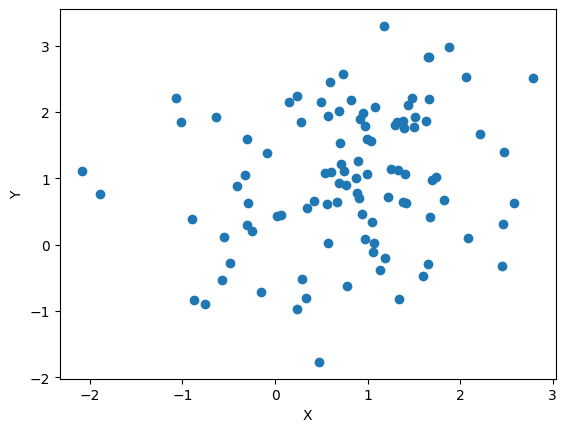

In [ ]:
sample = np.random.multivariate_normal(mu,sigma,100)
plt.scatter(sample[:,0],sample[:,1])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
sigmax = sigma[0,0]
sigmay = sigma[1,1]
sigmaxy = np.sqrt(sigma[1,0])
alpha =   (sigmay - sigmaxy)/(sigmax + sigmay - 2*sigmaxy)
sigmax, sigmay, sigmaxy, alpha

(np.float64(1.0), np.float64(1.25), np.float64(0.5), np.float64(0.6))

In [ ]:
sigmax_hat = np.var(sample[:,0])
sigmay_hat = np.var(sample[:,1])
alpha_hat = (sigmay_hat - sigmaxy)/(sigmax_hat + sigmay_hat - 2*sigmaxy)
alpha_hat

np.float64(0.6128822009151024)

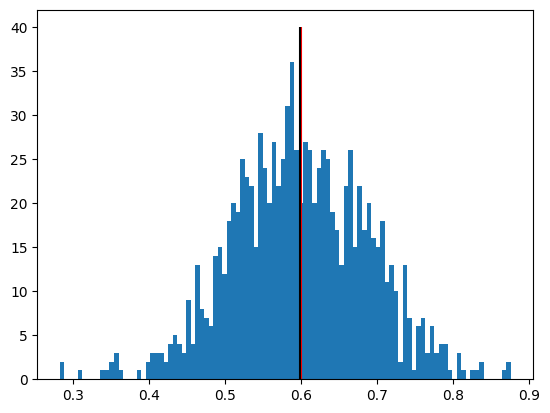

In [ ]:
alphas = []
for i in range(1000):
  sample = np.random.multivariate_normal(mu,sigma,100)
  sigmax_hat = np.var(sample[:,0])
  sigmay_hat = np.var(sample[:,1])
  alpha_hat = (sigmay_hat - sigmaxy)/(sigmax_hat + sigmay_hat - 2*sigmaxy)
  alphas.append(alpha_hat)

alpha_hat = np.mean(alphas)
alphas = np.array(alphas)
alphas = alphas[(alphas >-10) & (alphas<10)]
plt.hist(alphas, bins = 100)
plt.vlines(alpha, 0,40, 'red')
plt.vlines(alpha_hat, 0,40, 'black')
plt.show()

In [ ]:
alpha_hat

np.float64(0.600028067687541)

In [ ]:
se = np.std(alphas)
se

np.float64(0.09058621478668454)

Now let's generate the bootstrap samples and compute alpha with tem.

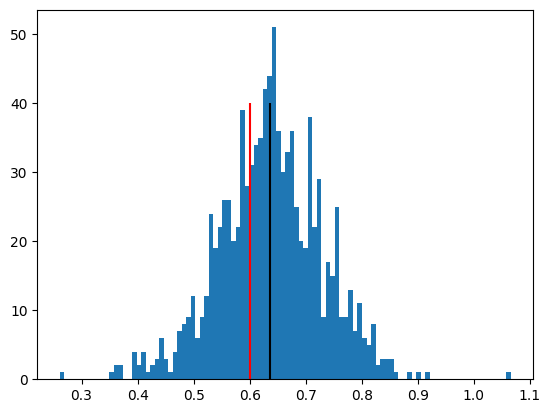

In [ ]:
alphas = []
sample = np.random.multivariate_normal(mu,sigma,1000)
for i in range(1000):
  bootstrap_indices = np.random.choice(sample.shape[0],100)
  sample_bootstrap = sample[bootstrap_indices]
  sigmax_hat = np.var(sample_bootstrap[:,0])
  sigmay_hat = np.var(sample_bootstrap[:,1])
  alpha_hat = (sigmay_hat - sigmaxy)/(sigmax_hat + sigmay_hat - 2*sigmaxy)
  alphas.append(alpha_hat)

alpha_hat = np.mean(alphas)
alphas = np.array(alphas)
alphas = alphas[(alphas >-10) & (alphas<10)]
plt.hist(alphas, bins = 100)
plt.vlines(alpha, 0,40, 'red')
plt.vlines(alpha_hat, 0,40, 'black')
plt.show()

In [ ]:
alpha_hat

np.float64(0.6369619172203176)

In [ ]:
se = np.std(alphas)
se

np.float64(0.09213933196180957)

###Bootstrap Confidence Intervals

##Normal intervals

In [ ]:
def conf_int(sample, n_int, sample_size, alpha):
  sample_emp = np.random.choice(sample, size=sample_size)  # bootstrap samples
  emp_mean = np.mean(sample_emp)
  se = np.std(sample_emp)
  z = stats.norm.ppf(1-alpha/2)
  ci_lower = emp_mean - z*(se / np.sqrt(sample_size))
  ci_upper = emp_mean + z*(se / np.sqrt(sample_size))
  conf_int = (ci_lower, ci_upper)
  lenght = np.absolute(ci_upper-ci_lower)
  dict_info = {'ci':conf_int, 'empirical mean': emp_mean, 'lenght of CI': lenght}
  return dict_info

In [ ]:
sample = np.random.poisson(lam=10, size=1000)

In [ ]:
true_mean = 10

In [ ]:
n_int = 25
intervals = []
sample_means = []
sample_size = 50
alpha = 0.05
for _ in range(n_int):
    ci_info = conf_int(sample, n_int, sample_size, alpha)
    confidence_interval = ci_info['ci']
    emp_mean = ci_info['empirical mean']
    sample_means.append(emp_mean)
    intervals.append(confidence_interval)

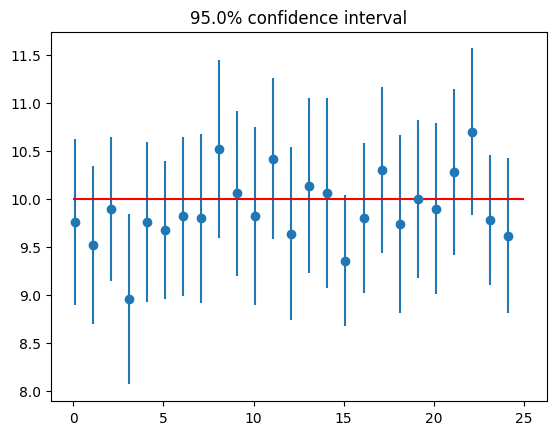

In [ ]:
plt.figure()

plt.errorbar(x=np.arange(0.1, n_int, 1), y=sample_means, yerr=[np.absolute(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=n_int, y=true_mean, linewidth=1.5, color="red")
plt.title(f"{(1-alpha)*100}% confidence interval")
plt.show()

### Percentile intervals

In [ ]:
sample = np.random.poisson(lam=10, size=1000)
sample_emp = np.random.choice(sample, size=100)  # bootstrap samples
emp_mean = np.mean(sample_emp) # bootstrap estimates

# 95% CI from bootstrap distribution
ci_lower_boot = np.percentile(sample_emp, 2.5)
ci_upper_boot = np.percentile(sample_emp, 97.5)


In [ ]:
ci_lower_boot, ci_upper_boot

(np.float64(4.475), np.float64(16.52499999999999))

In [ ]:
def ci_percentile(sample, n_int, sample_size, alpha):
  sample_emp = np.random.choice(sample, size=sample_size)  # bootstrap samples
  emp_mean = np.mean(sample_emp) # bootstrap estimates

  # 95% CI from bootstrap distribution
  ci_lower_boot = np.percentile(sample_emp, 2.5)
  ci_upper_boot = np.percentile(sample_emp, 97.5)
  conf_int = (ci_lower_boot, ci_upper_boot)
  lenght = np.absolute(ci_upper_boot-ci_lower_boot)
  dict_info = {'ci':conf_int, 'empirical mean': emp_mean, 'lenght of CI': lenght}
  return dict_info

In [ ]:
sample = np.random.poisson(lam=10, size=1000)
n_int = 25
intervals = []
sample_means = []
sample_size = 50
alpha = 0.05
for _ in range(n_int):
    ci_info = ci_percentile(sample, n_int, sample_size, alpha)
    confidence_interval = ci_info['ci']
    emp_mean = ci_info['empirical mean']
    sample_means.append(emp_mean)
    intervals.append(confidence_interval)

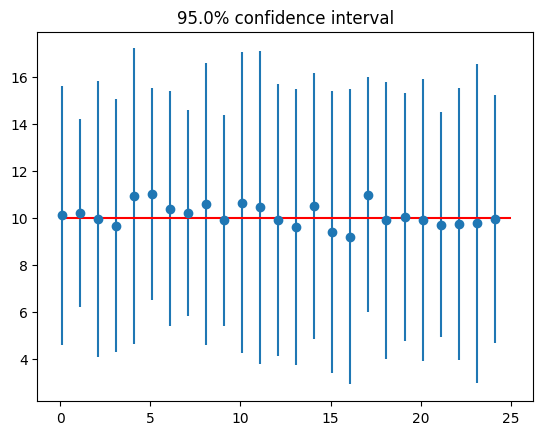

In [ ]:
plt.figure()

plt.errorbar(x=np.arange(0.1, n_int, 1), y=sample_means, yerr=[np.absolute(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=n_int, y=true_mean, linewidth=1.5, color="red")
plt.title(f"{(1-alpha)*100}% confidence interval")
plt.show()

### Pivotal intervals

In [ ]:
def ci_pivotal(sample, n_int, sample_size, alpha):
  sample_emp = np.random.choice(sample, size=sample_size)  # bootstrap samples
  emp_mean = np.mean(sample_emp) # bootstrap estimates

  # 95% CI from bootstrap distribution
  boot_inf = np.percentile(sample_emp, 2.5)
  boot_up = np.percentile(sample_emp, 97.5)
  conf_int = (2*emp_mean - boot_up, 2*emp_mean - boot_inf)
  lenght = np.absolute(ci_upper_boot-ci_lower_boot)
  dict_info = {'ci':conf_int, 'empirical mean': emp_mean, 'lenght of CI': lenght}
  return dict_info

In [ ]:
sample = np.random.poisson(lam=10, size=1000)
n_int = 25
intervals = []
sample_means = []
sample_size = 50
alpha = 0.05
for _ in range(n_int):
    ci_info = ci_percentile(sample, n_int, sample_size, alpha)
    confidence_interval = ci_info['ci']
    emp_mean = ci_info['empirical mean']
    sample_means.append(emp_mean)
    intervals.append(confidence_interval)

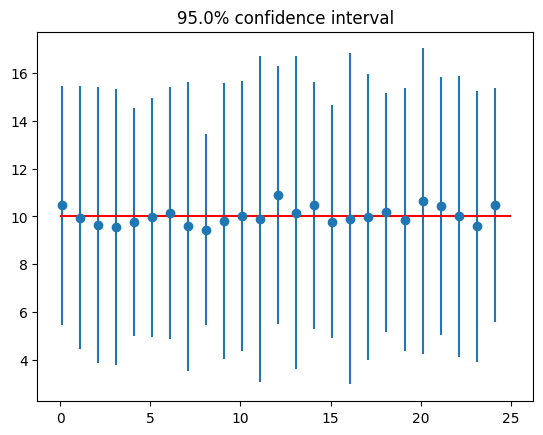

In [ ]:
plt.figure()

plt.errorbar(x=np.arange(0.1, n_int, 1), y=sample_means, yerr=[np.absolute(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=n_int, y=true_mean, linewidth=1.5, color="red")
plt.title(f"{(1-alpha)*100}% confidence interval")
plt.show()

### Comparing the three types of intervals

In [ ]:
sample = np.random.poisson(lam=10, size=10000)
sample_size = 100
sample_emp = np.random.choice(sample, size=sample_size)  # bootstrap samples
emp_mean = np.mean(sample_emp) # bootstrap estimates
alpha = 0.05

In [ ]:
###NORMAL INTERVAL
se = np.std(sample_emp)
z = stats.norm.ppf(1-alpha/2)
ci_lower_norm = emp_mean - z*(se / np.sqrt(sample_size))
ci_upper_norm = emp_mean + z*(se / np.sqrt(sample_size))
conf_int_norm = (ci_lower_norm, ci_upper_norm)
conf_int_norm

(np.float64(9.341292272692405), np.float64(10.618707727307596))

In [ ]:
#### PERCENTILE INTERVAL
# 95% CI from bootstrap distribution
ci_lower_perc = np.percentile(sample_emp, 2.5)
ci_upper_perc = np.percentile(sample_emp, 97.5)
conf_int_perc = (ci_lower_perc, ci_upper_perc)
conf_int_perc

(np.float64(3.475), np.float64(16.52499999999999))

In [ ]:
#### PIVOTAL
boot_inf = np.percentile(sample_emp, 2.5)
boot_up = np.percentile(sample_emp, 97.5)
ci_lower_piv = 2*emp_mean - boot_up
ci_upper_piv = 2*emp_mean - boot_inf
conf_int_piv = (ci_lower_piv, ci_upper_piv)
conf_int_piv

(np.float64(3.4350000000000094), np.float64(16.485))

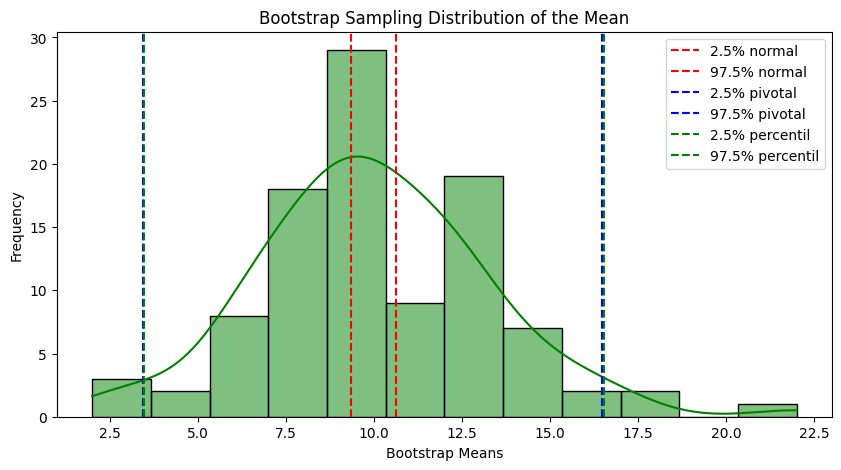

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(sample_emp, kde=True, color='green')
plt.axvline(ci_lower_norm, color='red', linestyle='--', label='2.5% normal')
plt.axvline(ci_upper_norm, color='red', linestyle='--', label='97.5% normal')
plt.axvline(ci_lower_piv, color='blue', linestyle='--', label='2.5% pivotal')
plt.axvline(ci_upper_piv, color='blue', linestyle='--', label='97.5% pivotal')
plt.axvline(ci_lower_perc, color='green', linestyle='--', label='2.5% percentil')
plt.axvline(ci_upper_perc, color='green', linestyle='--', label='97.5% percentil')
plt.title("Bootstrap Sampling Distribution of the Mean")
plt.xlabel("Bootstrap Means")
plt.ylabel("Frequency")
plt.legend()
plt.show()
